## Problem Statement: 
Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

The target feature is hospital_death which is a binary variable

In [1]:
# Dataset Link: https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

In [4]:
dataset_info = pd.read_csv('Dataset_features_info.csv')
dataset_info

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
6,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
7,demographic,ethnicity,None,string,The common national or cultural tradition whic...,Caucasian
8,demographic,gender,None,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


## Dataset Has 187 Features 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# importing plotly
import plotly.express as px
#import plotly.offline as py
#import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')


In [5]:
raw_data = pd.read_csv("Patient_survival_data.csv")
raw_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

# EDA

In [6]:
raw_data.shape

(91713, 186)

In [7]:
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [8]:
raw_data.nunique()

encounter_id                     91713
patient_id                       91713
hospital_id                        147
hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
hospital_admit_source               15
icu_admit_source                     5
icu_id                             241
icu_stay_type                        3
icu_type                             8
pre_icu_los_days                  9757
readmission_status                   1
weight                            3409
albumin_apache                      35
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
arf_apache                           2
bilirubin_apache                   362
bun_apache                         476
creatinine_apache        

In [9]:
raw_data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

Total no of null values

In [10]:
print((raw_data.isnull().sum().sum()/(raw_data.size)*100).round(2),'%')
print('Our Data Has Overall this Much Percentages of Null Values')

33.67 %
Our Data Has Overall this Much Percentages of Null Values


In [11]:
raw_data.isnull().sum(axis=0).sort_values(ascending=False)

h1_bilirubin_min                 84619
h1_bilirubin_max                 84619
h1_lactate_max                   84369
h1_lactate_min                   84369
h1_albumin_max                   83824
h1_albumin_min                   83824
h1_pao2fio2ratio_min             80195
h1_pao2fio2ratio_max             80195
h1_arterial_ph_max               76424
h1_arterial_ph_min               76424
h1_hco3_max                      76094
h1_hco3_min                      76094
h1_arterial_pco2_min             75959
h1_arterial_pco2_max             75959
h1_wbc_max                       75953
h1_wbc_min                       75953
h1_arterial_po2_max              75945
h1_arterial_po2_min              75945
h1_calcium_max                   75863
h1_calcium_min                   75863
h1_platelets_max                 75673
h1_platelets_min                 75673
h1_bun_max                       75091
h1_bun_min                       75091
h1_creatinine_max                74957
h1_creatinine_min        

In [12]:
print("Number of rows with missing values:", raw_data.isnull().any(axis=1).sum())

Number of rows with missing values: 91688


### Dropping Columns Which Has Missing Values more than 25000 

In [13]:
condition = raw_data.isnull().sum(axis=0).sort_values(ascending=False) > 25000
large_missing = raw_data.isnull().sum(axis=0).sort_values(ascending=False)[condition]
print("Total features with more than", 25000, "missing values:", len(large_missing))

Total features with more than 25000 missing values: 74


### 74 Features has missing values more than 25000 missing values which is approx 25%

In [14]:
raw_data.drop(large_missing.index.tolist(), axis =1, inplace = True)

In [15]:
raw_data.shape

(91713, 112)

### columns that can be dropped: 'encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status 

In [16]:
raw_data.drop(['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 
               'hospital_id', 'readmission_status'], 
              axis=1,
             inplace = True)

In [17]:
raw_data.shape

(91713, 104)

In [18]:
print((raw_data.isnull().sum().sum()/(raw_data.size)*100).round(2))
print('we observe 28% drop in null values')

5.96
we observe 28% drop in null values


In [19]:
raw_data['hospital_death'].unique()

array([0, 1], dtype=int64)

### Check this we are trying to select only some of columns in terms of bmi weight or height 

In [20]:
new_table = raw_data[['age','bmi', 'weight', 'height']]


<AxesSubplot:>

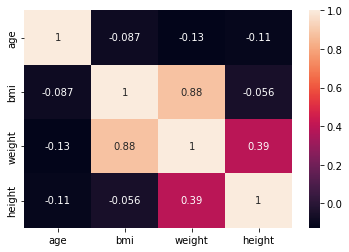

In [21]:
sns.heatmap(new_table.corr(), annot = True)

In [22]:
mice_imp = new_table[['age', 'bmi']]

In [23]:
#!pip install impyute

In [24]:
from impyute.imputation.cs import mice

# start the MICE training
mice_imp=mice(mice_imp.values)

In [25]:
mice_imp=pd.DataFrame(mice_imp)
mice_imp.isnull().sum()

0    0
1    0
dtype: int64

In [26]:
mice_imp.head()

,0,1
0,68.0,22.730000
1,77.0,27.420000
2,25.0,31.950000
3,81.0,22.640000
4,19.0,31.130891


In [27]:
raw_data['age'] = mice_imp[0].values
raw_data['bmi'] = mice_imp[1].values

In [28]:
print('Age has now ',raw_data['age'].isnull().sum(),'Null values')
print('bmi has now ',raw_data['bmi'].isnull().sum(),'Null values')

Age has now  0 Null values
bmi has now  0 Null values


##### Else we can Also Drop Rows With Age and Bmi having null Values  

In [29]:
#raw_data = raw_data[raw_data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
#raw_data.head()

In [30]:
raw_data.shape

(91713, 104)

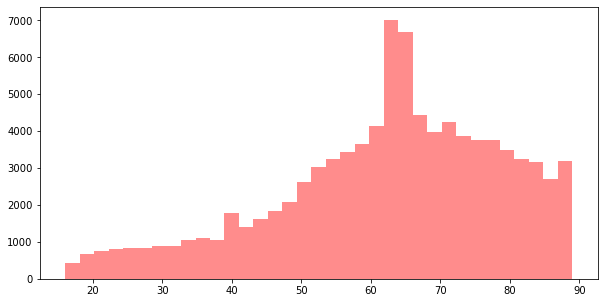

In [31]:
plt.figure(figsize=(10,5))
plt.hist(raw_data['age'],bins = 35,
         alpha = 0.45, color = 'red')
plt.show()

### As the Age increases 

In [32]:
print(raw_data['hospital_death'].nunique())
print(raw_data['hospital_death'].unique())
print(raw_data['hospital_death'].value_counts())

2
[0 1]
0    83798
1     7915
Name: hospital_death, dtype: int64


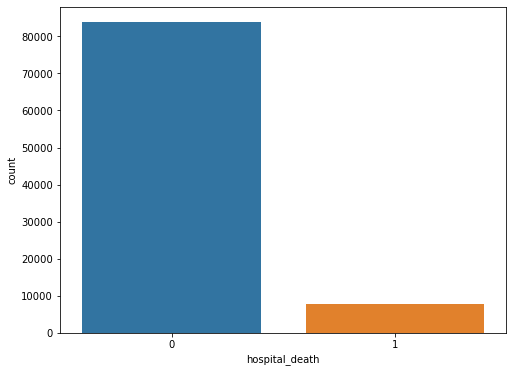

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='hospital_death', data=raw_data)
plt.show()

In [34]:
raw_data.groupby('gender')['hospital_death'].value_counts()

gender  hospital_death
F       0                 38488
        1                  3731
M       0                 45293
        1                  4176
Name: hospital_death, dtype: int64

#### We can see our data has very high imbalance so we are going to check values with this score and then oversampling and again check improvement in score

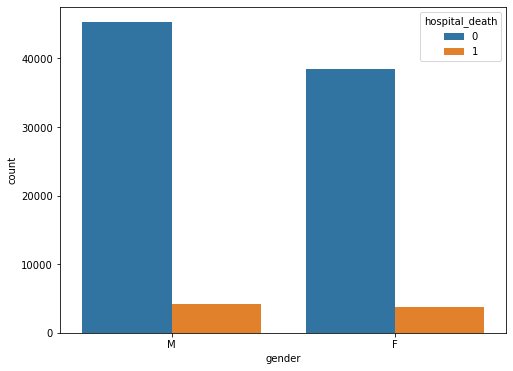

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='hospital_death', data=raw_data)
plt.show()

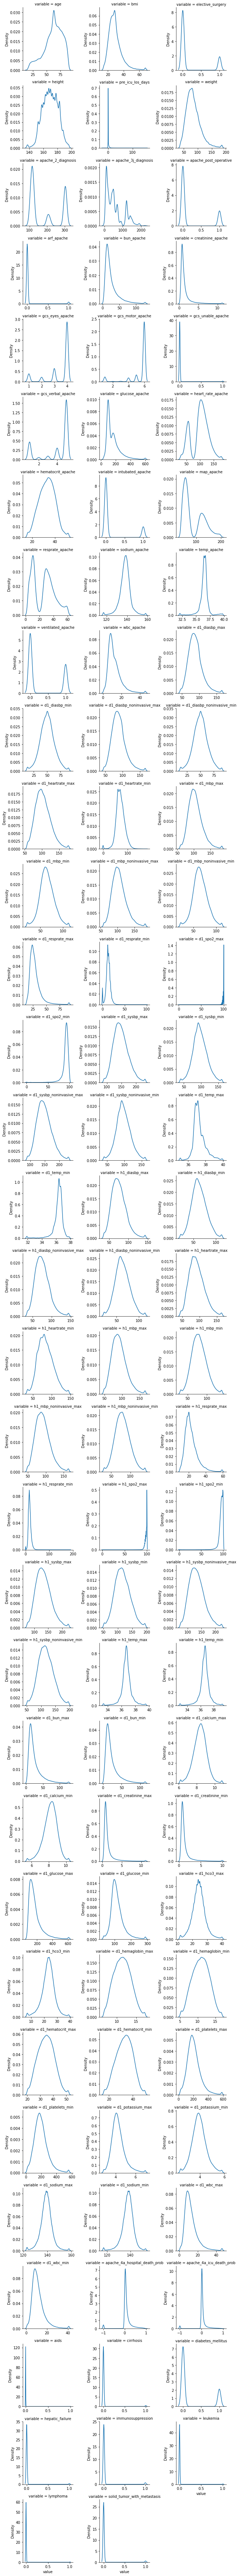

In [36]:
unpivot = pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

In [37]:
pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:])

,hospital_death,variable,value
0,0,age,68.0
1,0,age,77.0
2,0,age,25.0
3,0,age,81.0
4,0,age,19.0
...,...,...,...
8987869,0,solid_tumor_with_metastasis,1.0
8987870,0,solid_tumor_with_metastasis,0.0
8987871,0,solid_tumor_with_metastasis,0.0
8987872,0,solid_tumor_with_metastasis,0.0


In [38]:
raw_data.describe().columns[0]

'hospital_death'

In [39]:
raw_data.describe().columns[1:]

Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h

In [40]:
pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:]).shape

(8987874, 3)

In [41]:
for i in raw_data:
    print(raw_data[i].unique())

[0 1]
[68.         77.         25.         ... 63.17036767 64.20847387
 61.50622861]
[22.73       27.42       31.95       ... 33.81054776 45.93520298
 47.17967094]
[0 1]
['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
['M' 'F' nan]
[180.3  160.   172.7  165.1  188.   190.5  165.   170.2  175.3  154.9
 193.   167.6  177.8  162.6  152.4  149.9  182.9  162.5  151.8  157.5
 185.4  161.3  167.5  166.4     nan 157.4  170.   183.   195.59 182.8
 154.3  175.2  167.   163.8  179.1  173.   171.5  151.1  187.9  142.2
 158.   189.2  168.9  149.   180.   152.   182.   175.   177.   176.5
 167.7  144.8  149.8  147.3  137.2  156.2  174.   150.   163.   154.2
 179.   157.7  139.7  157.   178.   194.3  185.   153.7  154.   155.
 162.   172.5  184.2  161.9  181.6  162.4  158.8  154.6  180.2  170.3
 169.   158.1  171.   173.4  187.3  181.4  177.9  147.   157.2  168.
 152.6  148.4  184.5  157.9  186.7  164.   172.4  143.   172.   173.5
 170.1  157.6  162.9  175.1

[ 74.  70.  91.  99. 100.  97.  92.  96.  93.  87.  98.  84.  94.  95.
  90.  78.  81.  80.  71.  88.  77.  86.  nan  89.  83.  82.  85.  16.
  75.  47.  51.  64.  33.  79.  45.  76.  68.  44.  73.  42.  32.  69.
  57.  52.  67.  60.  72.  55.  50.  28.  40.  12.  27.  63.  10.  22.
   5.   4.  14.  53.   6.  62.   2.  66.  39.  59.  48.  20.  35.   0.
  54.  61.  11.  31.  65.   3.  30.  23.  58.  24.  37.  17.  46.  29.
  25.  56.  43.  15.   9.  21.  49.  26.  41.   1.  38.  18.  13.   8.
  34.  36.  19.]
[131.  95. 148. 136. 130. 143. 191. 119. 104. 135. 145. 163. 138. 113.
 169. 121. 146. 142. 164. 106. 159. 127.  98. 165. 170. 154. 123. 137.
 176. 111. 156. 216. 198. 150. 155.  93. 166.  97. 183. 110. 160. 129.
 124. 147. 201. 167. 140. 107. 116. 105. 109. 168. 108. 175. 141. 203.
 178. 158. 122. 120.  nan  75. 151. 157. 190. 152. 172. 188. 134. 115.
 223.  91. 173. 128. 177.  99.  90. 161. 212. 125. 174. 114. 112. 162.
 204. 117. 102.  92.  87. 182. 132.  96. 180. 144. 193. 126.

[136.  145.    nan 137.  140.  142.  139.  141.  132.  138.  146.  134.
 131.  147.  144.  143.  127.  135.  153.  152.  123.  133.  150.  155.
 130.  148.  128.  154.  129.  151.  149.  124.  126.  158.  156.  125.
 157.  134.4 145.9 139.7 131.4 134.7 141.6 137.7 138.4 140.5 147.1 145.3
 137.8 139.9 130.8 139.2 151.1 144.5 132.6 138.3 148.1 133.2 146.2 142.5
 138.1 140.2 144.2 139.4 140.6 135.6 139.5 139.1 135.4 141.4 145.8 134.8]
[134.  145.    nan 137.  135.  140.  142.  139.  132.  138.  146.  136.
 131.  147.  144.  127.  130.  143.  141.  133.  120.  126.  119.  129.
 148.  153.  117.  124.  149.  151.  121.  152.  128.  123.  125.  122.
 150.  118.  139.6 144.3 136.8 134.4 145.9 140.7 135.6 137.8 140.8 139.7
 130.1 134.5 134.7 139.2 139.1 128.5 127.2 136.3 139.5 137.4 130.3 142.8
 143.8 142.1 134.9 137.2 139.8 140.1 127.8 136.4 130.8 143.4 135.3 134.2
 143.1 136.9 133.4 123.4 144.4 131.5 147.4 129.7 138.2 136.7 136.2 144.9
 139.3 131.6 148.5 134.1 134.8 134.6 140.4 135.9 132.7 1

#### Here i am considering features with numerical unique values = 2 as a categorical variable 

In [42]:
# int type but with 2 distinct values
raw_data.nunique()[raw_data.nunique() == 2].index.tolist()

['hospital_death',
 'elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

### categorical values with object as a dtype

In [43]:
raw_data.select_dtypes(include='O').columns.values.tolist()

['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [44]:
numerical_cat = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']


categorical = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

### Analysing the heatmap for numerical variables 

<AxesSubplot:>

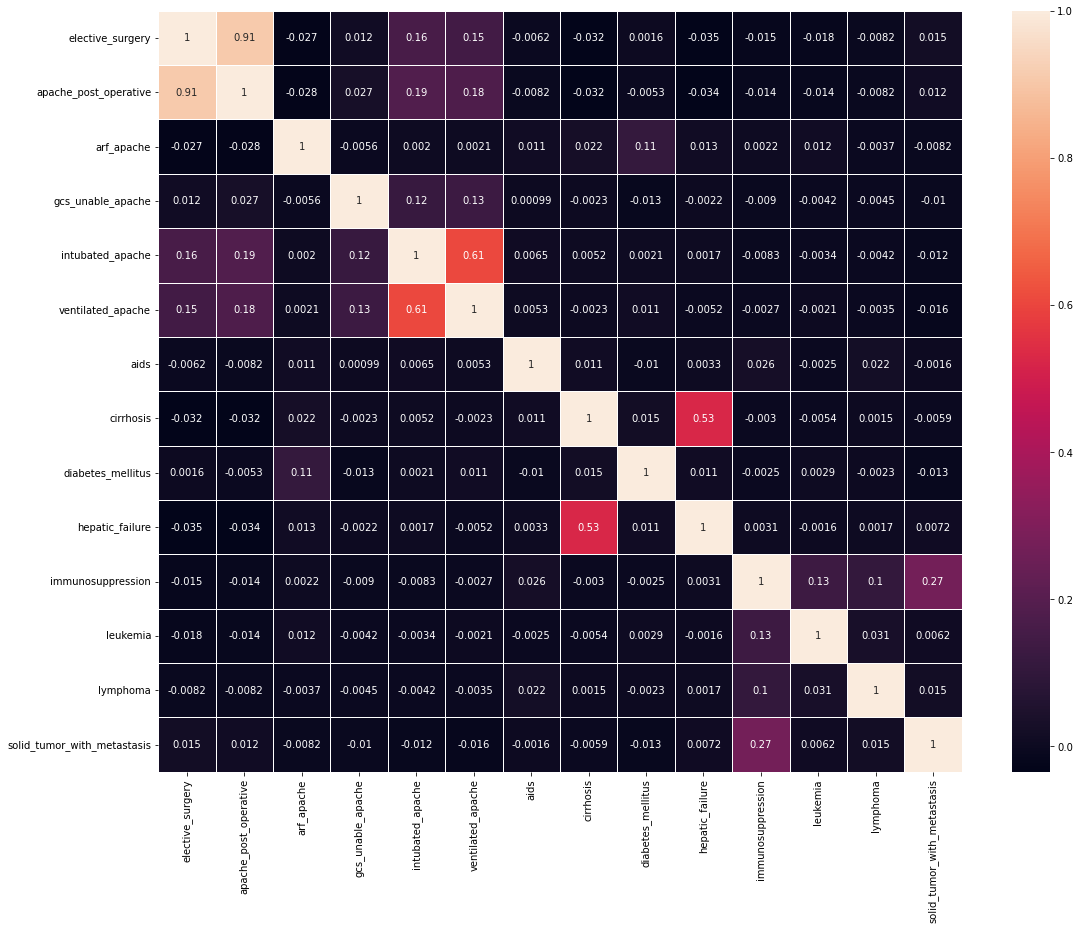

In [45]:
fig, ax = plt.subplots(figsize=(18,14))        
sns.heatmap(raw_data[['elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']].corr(), annot=True, linewidths=.8, ax=ax)

##### Finding numeric types in our dataset 

In [46]:
not_numeric = raw_data[numerical_cat + categorical + ['hospital_death']].columns.tolist()
numeric_only = raw_data.drop(not_numeric,axis=1).columns.tolist()
numeric_only

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_re

#### First converting the data type as int for all and then filling values with mode

In [47]:
for col in numerical_cat:
    raw_data[col] = raw_data[col].astype('Int64')
    
for col in numerical_cat:
    raw_data[col] = raw_data[col].fillna(raw_data[col].mode()[0])

#### Checking Null values in Numeric type data 


In [48]:
raw_data[numeric_only].isna().sum(axis=0).sort_values(ascending=False)

wbc_apache                       22012
h1_temp_max                      21732
h1_temp_min                      21732
hematocrit_apache                19878
bun_apache                       19262
creatinine_apache                18853
sodium_apache                    18600
d1_hco3_max                      15071
d1_hco3_min                      15071
d1_platelets_min                 13444
d1_platelets_max                 13444
d1_wbc_max                       13174
d1_wbc_min                       13174
d1_calcium_min                   13069
d1_calcium_max                   13069
d1_hemaglobin_max                12147
d1_hemaglobin_min                12147
d1_hematocrit_max                11654
d1_hematocrit_min                11654
glucose_apache                   11036
d1_bun_min                       10514
d1_bun_max                       10514
d1_sodium_max                    10195
d1_sodium_min                    10195
d1_creatinine_min                10169
d1_creatinine_max        

#### here we can see that more columns has null values below 11000, it is affordable for us to drop those rows and also we have high number of rows so we can drop it 

In [49]:
split_one = raw_data[numeric_only].isna().sum(axis=0).sort_values()[raw_data[numeric_only].isna().sum(axis=0) < 11000].index.tolist()
split_two = raw_data[numeric_only].isna().sum(axis=0).sort_values()[raw_data[numeric_only].isna().sum(axis=0) > 11000].index.tolist()

In [50]:
print(len(split_one), ' Columns has null values below 11000')
print(len(split_two), ' Columns has null values above 11000')

64  Columns has null values below 11000
20  Columns has null values above 11000


In [51]:
split_two  # only this much column values needed to be replace with median

['glucose_apache',
 'd1_hematocrit_min',
 'd1_hematocrit_max',
 'd1_hemaglobin_min',
 'd1_hemaglobin_max',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_hco3_min',
 'd1_hco3_max',
 'sodium_apache',
 'creatinine_apache',
 'bun_apache',
 'hematocrit_apache',
 'h1_temp_max',
 'h1_temp_min',
 'wbc_apache']

In [52]:
for col in split_two:
    raw_data[col] = raw_data[col].fillna(raw_data[col].median())

process_data = raw_data.dropna(axis=0)

In [53]:
print("Number of rows now in data set: ", process_data.shape[0])

Number of rows now in data set:  58551


In [54]:
process_data[categorical].nunique()

ethnicity                6
gender                   2
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

Using one-hot encoder because of large range of unique values in categories

In [55]:
icu_data = pd.get_dummies(process_data,columns=categorical)

In [56]:
icu_data

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.10,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,0.10,0.05,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.70,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,0.47,0.29,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113.0,44.2,0,130.0,35.0,137.0,36.6,0,10.90,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0

In [57]:
icu_data.reset_index(drop = True, inplace = True)

In [58]:
icu_data.shape

(58551, 136)

In [59]:
icu_data.columns = [x.lower() for x in icu_data.columns.tolist()]
icu_data = icu_data.loc[:,~icu_data.columns.duplicated()]

In [60]:
icu_data.shape

(58551, 135)

In [61]:
#icu_data['hospital_death'].head(100)

In [62]:
icu_data.isnull().sum()

hospital_death                               0
age                                          0
bmi                                          0
elective_surgery                             0
height                                       0
pre_icu_los_days                             0
weight                                       0
apache_2_diagnosis                           0
apache_3j_diagnosis                          0
apache_post_operative                        0
arf_apache                                   0
bun_apache                                   0
creatinine_apache                            0
gcs_eyes_apache                              0
gcs_motor_apache                             0
gcs_unable_apache                            0
gcs_verbal_apache                            0
glucose_apache                               0
heart_rate_apache                            0
hematocrit_apache                            0
intubated_apache                             0
map_apache   

In [63]:
icu_data.dtypes

hospital_death                                 int64
age                                          float64
bmi                                          float64
elective_surgery                               Int64
height                                       float64
pre_icu_los_days                             float64
weight                                       float64
apache_2_diagnosis                           float64
apache_3j_diagnosis                          float64
apache_post_operative                          Int64
arf_apache                                     Int64
bun_apache                                   float64
creatinine_apache                            float64
gcs_eyes_apache                              float64
gcs_motor_apache                             float64
gcs_unable_apache                              Int64
gcs_verbal_apache                            float64
glucose_apache                               float64
heart_rate_apache                            f

##### Converting uint8 into int

In [64]:
t = icu_data['arf_apache'].dtype
for col in icu_data.columns.tolist():
    if icu_data[col].values.dtype == 'uint8' or t == icu_data[col].values.dtype:
        icu_data[col] = icu_data[col].astype(int)

In [65]:
icu_data.dtypes

hospital_death                                 int64
age                                          float64
bmi                                          float64
elective_surgery                               int32
height                                       float64
pre_icu_los_days                             float64
weight                                       float64
apache_2_diagnosis                           float64
apache_3j_diagnosis                          float64
apache_post_operative                          int32
arf_apache                                     int32
bun_apache                                   float64
creatinine_apache                            float64
gcs_eyes_apache                              float64
gcs_motor_apache                             float64
gcs_unable_apache                              int32
gcs_verbal_apache                            float64
glucose_apache                               float64
heart_rate_apache                            f

##### Converting the Existing file into csv

In [66]:
icu_data.to_csv('patient_survival_preprocessed', index = False)

In [67]:
nf = pd.read_csv('patient_survival_preprocessed')

In [68]:
df = pd.read_csv('patient_survival_preprocessed')

In [69]:
df.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_african american,ethnicity_asian,ethnicity_caucasian,ethnicity_hispanic,ethnicity_native american,ethnicity_other/unknown,gender_f,gender_m,icu_type_ccu-cticu,icu_type_csicu,icu_type_cticu,icu_type_cardiac icu,icu_type_micu,icu_type_med-surg icu,icu_type_neuro icu,icu_type_sicu,apache_3j_bodysystem_cardiovascular,apache_3j_bodysystem_gastrointestinal,apache_3j_bodysystem_genitourinary,apache_3j_bodysystem_gynecological,apache_3j_bodysystem_hematological,apache_3j_bodysystem_metabolic,apache_3j_bodysystem_musculoskeletal/skin,apache_3j_bodysystem_neurological,apache_3j_bodysystem_respiratory,apache_3j_bodysystem_sepsis,apache_3j_bodysystem_trauma,apache_2_bodysystem_cardiovascular,apache_2_bodysystem_gastrointestinal,apache_2_bodysystem_haematologic,apache_2_bodysystem_metabolic,apache_2_bodysystem_neurologic,apache_2_bodysystem_renal/genitourinary,apache_2_bodysystem_respiratory,apache_2_bodysystem_trauma,apache_2_bodysystem_undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,13.0,0.71,4.0,6.0,0,5.0,156.0,113.0,44.2,0,130.0,35.0,137.0,36.6,0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71

In [70]:
icu_data.shape

(58551, 135)

# Modelling

# Decision Tree

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = icu_data.drop(['hospital_death'], axis=1)
y = icu_data['hospital_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=11, 
                                                    stratify = y)

# Applying Decision tree

# Drawing Confusion Matrix 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

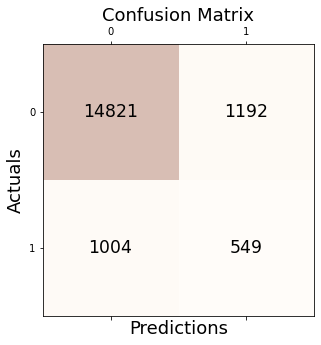

In [74]:
# Fit the DT model
#
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = dt.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [75]:
dt_precision =precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print('Precision: %.3f' % dt_precision)
print('Recall: %.3f' % dt_recall)
print('Accuracy: %.3f' % dt_accuracy)
print('F1 Score: %.3f' % dt_f1)

Precision: 0.315
Recall: 0.354
Accuracy: 0.875
F1 Score: 0.333


# Applying logistic regression

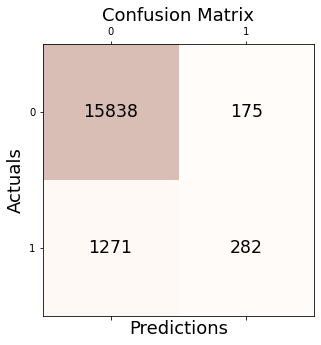

In [76]:
from sklearn.linear_model import LogisticRegression
# Fit the LR model
#
lr = LogisticRegression()
lr.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = lr.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [77]:
lr_precision =  precision_score(y_test, y_pred)
lr_recall =  recall_score(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1 =  f1_score(y_test, y_pred)

print('Precision: %.3f' % lr_precision)
print('Recall: %.3f' % lr_recall)
print('Accuracy: %.3f' % lr_accuracy)
print('F1 Score: %.3f' % lr_f1)

Precision: 0.617
Recall: 0.182
Accuracy: 0.918
F1 Score: 0.281


# Applying Random Forest

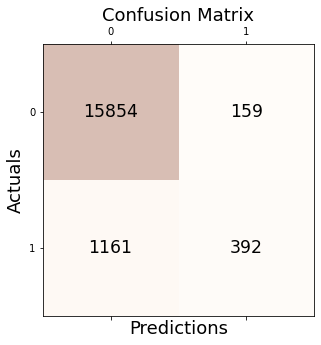

In [78]:
# random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = rf.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
rf_precision= precision_score(y_test, y_pred)
rf_recall= recall_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

rf_precision = print('Precision: %.3f' % rf_precision)
rf_recall = print('Recall: %.3f' % rf_recall)
rf_accuracy = print('Accuracy: %.3f' % rf_accuracy)
print('F1 Score: %.3f' % rf_f1)

Precision: 0.711
Recall: 0.252
Accuracy: 0.925
F1 Score: 0.373


# Xgb Classifier

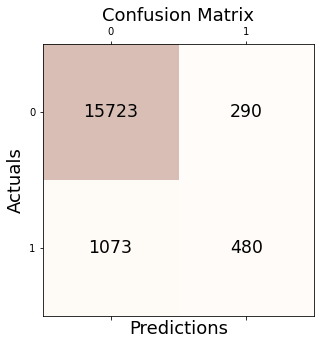

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# Fit the SVC model
#
svc = XGBClassifier()
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [81]:
xgb_precision= precision_score(y_test, y_pred)
xgb_recall=recall_score(y_test, y_pred)
xgb_accuracy=accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)

print('Precision: %.3f' % xgb_precision)
print('Recall: %.3f' % xgb_recall)
print('Accuracy: %.3f' % xgb_accuracy)
print('F1 Score: %.3f' % xgb_f1)

Precision: 0.623
Recall: 0.309
Accuracy: 0.922
F1 Score: 0.413


### As My Dataset is imbalance so recall coming is very low so checking the same results on the balanced dataser

### Handling Imbalance Data With Synthetic Minority Oversampling Technique (SMOTE) 

In [82]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3624
Before OverSampling, counts of label '0': 37361 

After OverSampling, the shape of train_X: (74722, 134)
After OverSampling, the shape of train_y: (74722,) 

After OverSampling, counts of label '1': 37361
After OverSampling, counts of label '0': 37361


In [83]:
X_train.shape

(40985, 134)

In [84]:
X_train_res.shape

(74722, 134)

In [85]:
X_test.shape

(17566, 134)

In [86]:
y_test.shape

(17566,)

In [87]:
y_train.shape

(40985,)

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

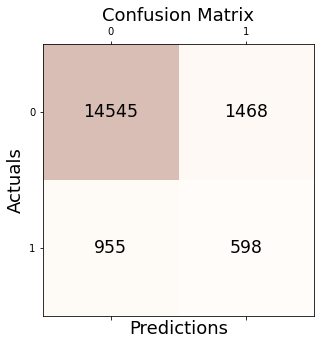

In [89]:
# Fit the DT model
#
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
#
# Get the predictions
#
y_pred = dt.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [90]:
dt_precision = print('Precision: %.3f' % precision_score(y_test, y_pred))
dt_recall = print('Recall: %.3f' % recall_score(y_test, y_pred))
dt_accuracy = print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
dt_f1 = print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.289
Recall: 0.385
Accuracy: 0.862
F1 Score: 0.330


In [91]:
# random forest

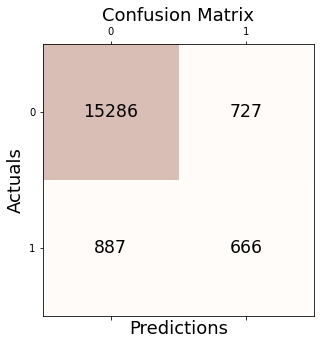

In [92]:
# random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
#
# Get the predictions
#
y_pred = rf.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [93]:
rf_precision = print('Precision: %.3f' % precision_score(y_test, y_pred))
rf_recall = print('Recall: %.3f' % recall_score(y_test, y_pred))
rf_accuracy = print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
rf_f1 = print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.478
Recall: 0.429
Accuracy: 0.908
F1 Score: 0.452


In [94]:
#Logistic regression

In [95]:
dt_precision = print('Precision: %.3f' % precision_score(y_test, y_pred))
dt_recall = print('Recall: %.3f' % recall_score(y_test, y_pred))
dt_accuracy = print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
dt_f1 = print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.478
Recall: 0.429
Accuracy: 0.908
F1 Score: 0.452


In [96]:
#XGB

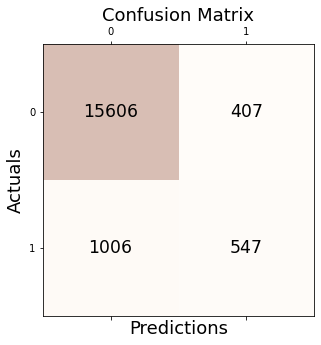

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# Fit the SVC model
#
svc = XGBClassifier()
svc.fit(X_train_res, y_train_res)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [98]:
dt_precision = print('Precision: %.3f' % precision_score(y_test, y_pred))
dt_recall = print('Recall: %.3f' % recall_score(y_test, y_pred))
dt_accuracy = print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
dt_f1 = print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.573
Recall: 0.352
Accuracy: 0.920
F1 Score: 0.436


# Hyperparameter tuning